In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
d = pickle.load(open("/home/neo/Desktop/data/frame_level_fa2.pkl", "rb"))

In [3]:
uttid = "1272-128104-0008"

In [4]:
cosin_square_no_decay_const = np.load("/home/neo/MS/ICASSP_2020/FA/results/const_al/{0}.ep.1.npy".format(uttid))
cosin_square_no_decay_const_16 = np.load("/home/neo/MS/ICASSP_2020/FA/results/const_al/{0}.ep.14.npy".format(uttid))

cosin_square_no_decay_const_base = np.load("/home/neo/MS/ICASSP_2020/FA/results/const_base/{0}.ep.1.npy".format(uttid))
cosin_square_no_decay_const_base_16 = np.load("/home/neo/MS/ICASSP_2020/FA/results/const_base/{0}.ep.16.npy".format(uttid))

cosin_square_no_decay_auto = np.load("/home/neo/MS/ICASSP_2020/FA/results/auto_al/{0}.ep.11.npy".format(uttid))
cosin_square_no_decay_auto_base = np.load("/home/neo/MS/ICASSP_2020/FA/results/auto_base/{0}.ep.11.npy".format(uttid))

In [5]:
oracle_att = d[uttid]

In [6]:
len(oracle_att), cosin_square_no_decay_const.shape

(47, (47, 510))

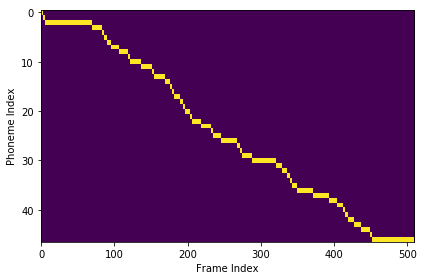

In [7]:
new_atts = np.zeros((cosin_square_no_decay_const.shape))
for i,row in enumerate(oracle_att):
    new_atts[i][row[0]:row[1]] = 1
# new_atts[-2][266:]=1

plt.imshow(new_atts, aspect="auto")
plt.xlabel("Frame Index")
plt.ylabel("Phoneme Index")
plt.tight_layout()
plt.savefig("/home/neo/MS/ICASSP_2020/FA/{0}_GMM_HMM.png".format(uttid), dpi=500)

In [8]:
colors = ["b", "g", "r", "c", "k", "m"]

In [9]:
new_atts.shape

(47, 510)

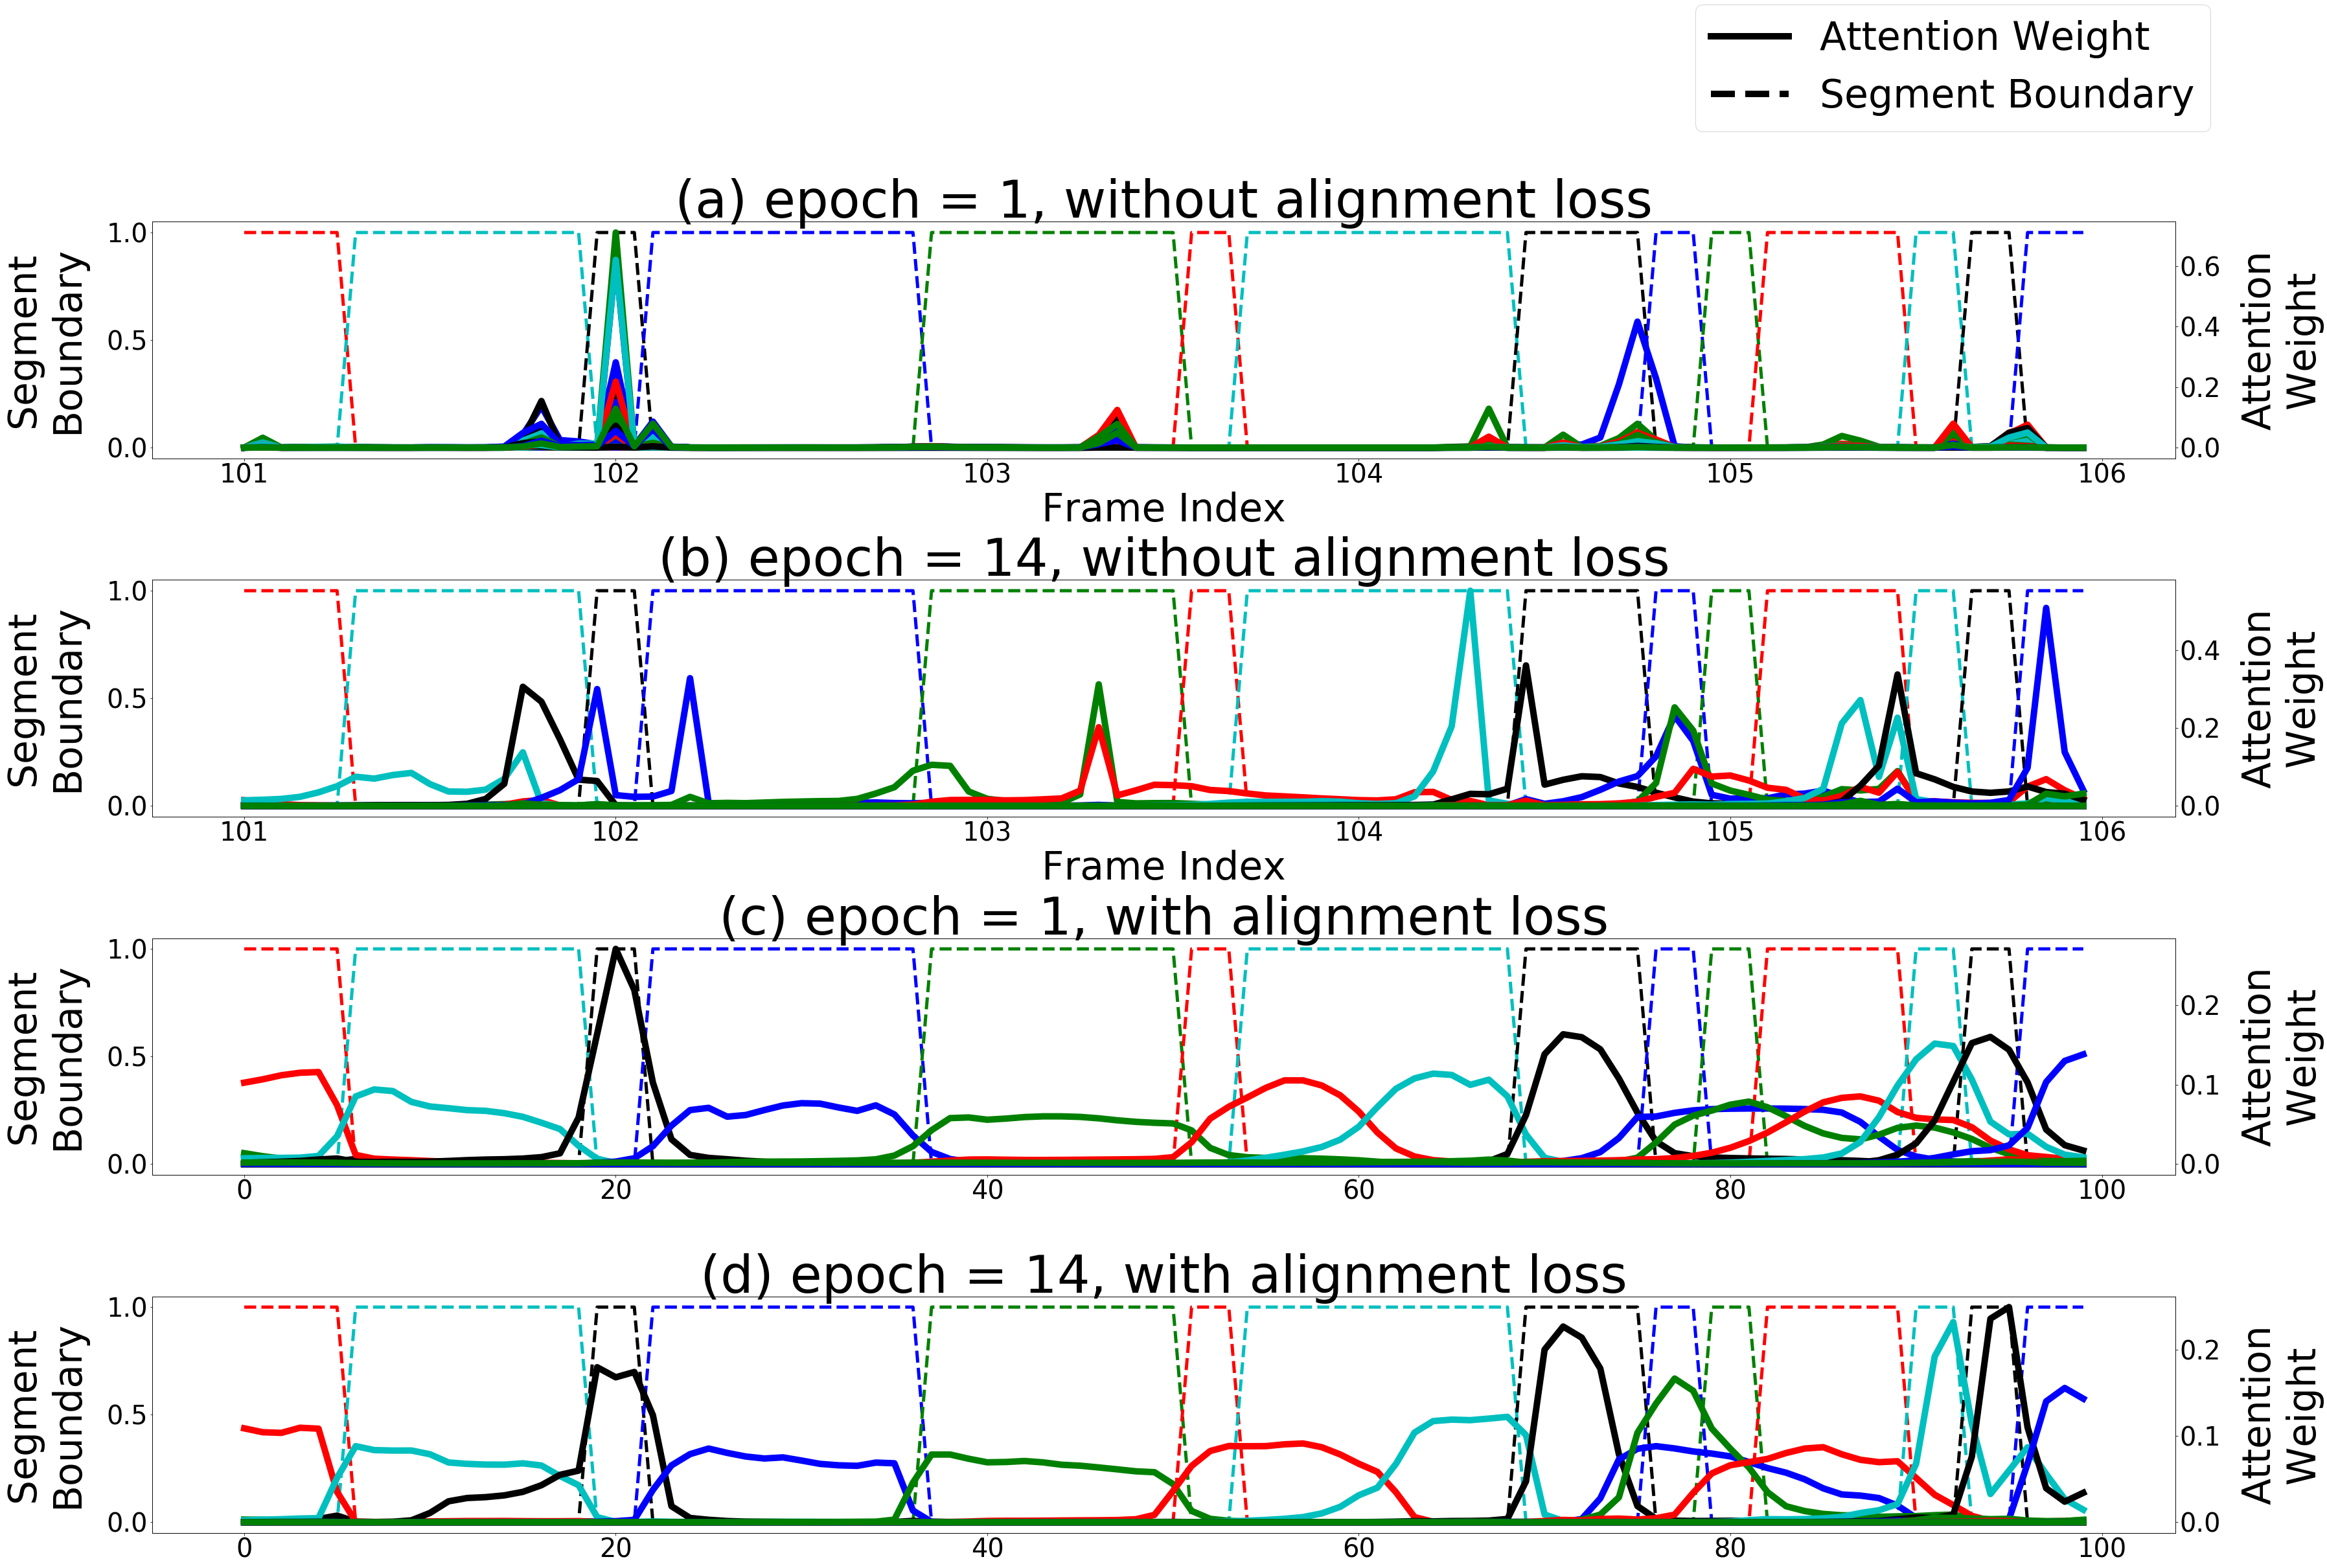

In [10]:
fig, ax = plt.subplots(4,1, figsize=(50,30))

ax1 = ax[0]
ax1_f = ax1.twinx()
ax2 = ax[1]
ax2_f = ax2.twinx()

ax3 = ax[2]
ax3_f = ax3.twinx()
ax4 = ax[3]
ax4_f = ax4.twinx()


for i in range(len(new_atts)):
    ax1.plot(new_atts[i][100:200], linestyle='--', linewidth=5, color=colors[i%5])
    ax1_f.plot(cosin_square_no_decay_const_base[i][100:200], linestyle='-', linewidth=10, color=colors[i%5])
    
    ax2.plot(new_atts[i][100:200], linestyle='--', linewidth=5, color=colors[i%5])
    ax2_f.plot(cosin_square_no_decay_const_base_16[i][100:200], linestyle='-', linewidth=10, color=colors[i%5])
    
    ax3.plot(new_atts[i][100:200], linestyle='--', linewidth=5, color=colors[i%5])
    ax3_f.plot(cosin_square_no_decay_const[i][100:200], linestyle='-', linewidth=10, color=colors[i%5])
    
    ax4.plot(new_atts[i][100:200], linestyle='--', linewidth=5, color=colors[i%5])
    ax4_f.plot(cosin_square_no_decay_const_16[i][100:200], linestyle='-', linewidth=10, color=colors[i%5])
    
ax[0].set_xlabel("Frame Index", fontsize=60)
ax[1].set_xlabel("Frame Index", fontsize=60)
ax[0].set_xticklabels(np.arange(100,150), fontsize=40)
ax[1].set_xticklabels(np.arange(100,150), fontsize=40)

ax1.set_ylabel("Segment\nBoundary", fontsize=60, labelpad=30)
ax2.set_ylabel("Segment\nBoundary", fontsize=60,  labelpad=30)

ax3.set_ylabel("Segment\nBoundary", fontsize=60, labelpad=30)
ax4.set_ylabel("Segment\nBoundary", fontsize=60,  labelpad=30)


ax1_f.set_ylabel("Attention\nWeight", fontsize=60, labelpad=30)
ax2_f.set_ylabel("Attention\nWeight", fontsize=60, labelpad=30)

ax3_f.set_ylabel("Attention\nWeight", fontsize=60, labelpad=30)
ax4_f.set_ylabel("Attention\nWeight", fontsize=60, labelpad=30)


ax[0].set_title("(a) epoch = 1, without alignment loss", fontsize=80)
ax[1].set_title("(b) epoch = 14, without alignment loss", fontsize=80)
ax[2].set_title("(c) epoch = 1, with alignment loss", fontsize=80)
ax[3].set_title("(d) epoch = 14, with alignment loss", fontsize=80)

ax[0].tick_params(axis='both', which='major', labelsize=40)
ax[1].tick_params(axis='both', which='major', labelsize=40)

ax1_f.tick_params(axis='both', which='major', labelsize=40)
ax2_f.tick_params(axis='both', which='major', labelsize=40)

ax[0].tick_params(axis='both', which='major', labelsize=40)
ax[1].tick_params(axis='both', which='major', labelsize=40)

ax1_f.tick_params(axis='both', which='minor', labelsize=40)
ax2_f.tick_params(axis='both', which='minor', labelsize=40)


ax[2].tick_params(axis='both', which='major', labelsize=40)
ax[3].tick_params(axis='both', which='major', labelsize=40)

ax3_f.tick_params(axis='both', which='major', labelsize=40)
ax4_f.tick_params(axis='both', which='major', labelsize=40)

ax[2].tick_params(axis='both', which='major', labelsize=40)
ax[3].tick_params(axis='both', which='major', labelsize=40)

ax3_f.tick_params(axis='both', which='minor', labelsize=40)
ax4_f.tick_params(axis='both', which='minor', labelsize=40)


cmap = plt.cm.coolwarm
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='black', lw=10, linestyle='-'),
                Line2D([0], [0], color='black', lw=10, linestyle='--')]

ax[0].legend(custom_lines, ['Attention Weight', 'Segment Boundary'], fontsize=60, loc="upper center", bbox_to_anchor=(0.89, 2))

fig.tight_layout()
plt.savefig("/home/neo/MS/ICASSP_2020/FA/{0}_al_plot.png".format(uttid), dpi=300)

In [11]:
# fig, ax = plt.subplots(4,1, figsize=(50,30))

# ax1 = ax[0]
# ax1_f = ax1.twinx()
# ax2 = ax[1]
# ax2_f = ax2.twinx()

# for i in range(len(new_atts)):
#     ax1.plot(new_atts[i][100:200], linestyle='--', linewidth=5, color=colors[i%5])
#     ax1_f.plot(cosin_square_no_decay_const[i][100:200], linestyle='-', linewidth=10, color=colors[i%5])
    
#     ax2.plot(new_atts[i][100:200], linestyle='--', linewidth=5, color=colors[i%5])
#     ax2_f.plot(cosin_square_no_decay_const_base[i][100:200], linestyle='-', linewidth=10, color=colors[i%5])

# ax[0].set_xlabel("Frame Index", fontsize=60)
# ax[1].set_xlabel("Frame Index", fontsize=60)
# ax[0].set_xticklabels(np.arange(100,150), fontsize=40)
# ax[1].set_xticklabels(np.arange(100,150), fontsize=40)

# ax1.set_ylabel("Segment\nBoundary", fontsize=60, labelpad=30)
# ax2.set_ylabel("Segment\nBoundary", fontsize=60,  labelpad=30)

# ax1_f.set_ylabel("Attention\nWeight", fontsize=60, labelpad=30)
# ax2_f.set_ylabel("Attention\nWeight", fontsize=60, labelpad=30)

# ax[0].set_title("(a)\nModel with alignment loss", fontsize=80)
# ax[1].set_title("(b)\nModel without alignment loss", fontsize=80)

# ax[0].tick_params(axis='both', which='major', labelsize=40)
# ax[1].tick_params(axis='both', which='major', labelsize=40)

# ax1_f.tick_params(axis='both', which='major', labelsize=40)
# ax2_f.tick_params(axis='both', which='major', labelsize=40)

# ax[0].tick_params(axis='both', which='major', labelsize=40)
# ax[1].tick_params(axis='both', which='major', labelsize=40)

# ax1_f.tick_params(axis='both', which='minor', labelsize=40)
# ax2_f.tick_params(axis='both', which='minor', labelsize=40)

# cmap = plt.cm.coolwarm
# from matplotlib.lines import Line2D
# custom_lines = [Line2D([0], [0], color='red', lw=6, linestyle='-'),
#                 Line2D([0], [0], color='blue', lw=6, linestyle='--')]

# ax[0].legend(custom_lines, ['Attention Weight', 'Segment Boundary'], fontsize=60, loc="upper center", bbox_to_anchor=(0.89, 1.4))

# fig.tight_layout()
# plt.savefig("/home/neo/MS/ICASSP_2020/FA/{0}_al_plot.png".format(uttid), dpi=300)

In [12]:
# plt.figure(figsize=(100,20))
# for i in range(len(new_atts)):
#     plt.plot(new_atts[i][100:200], linestyle='--', linewidth=5, color=colors[i%5])
#     plt.plot(cosin_square_no_decay_const_base[i][100:200], linestyle='-', linewidth=10, color=colors[i%5])
# plt.xticks(fontsize=84)
# plt.yticks(fontsize=84)
# plt.tight_layout()
# plt.savefig("/home/neo/MS/ICASSP_2020/FA/{0}_base_plot.png".format(uttid), dpi=300)